In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt


os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#2): Which is digit '4'


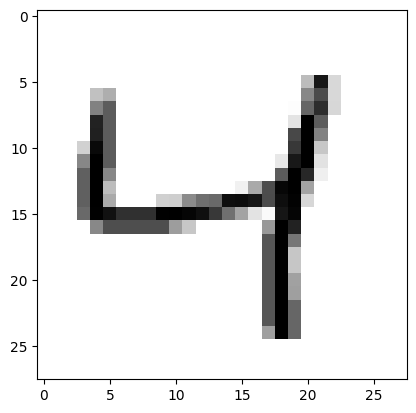

In [4]:
digit = 2 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

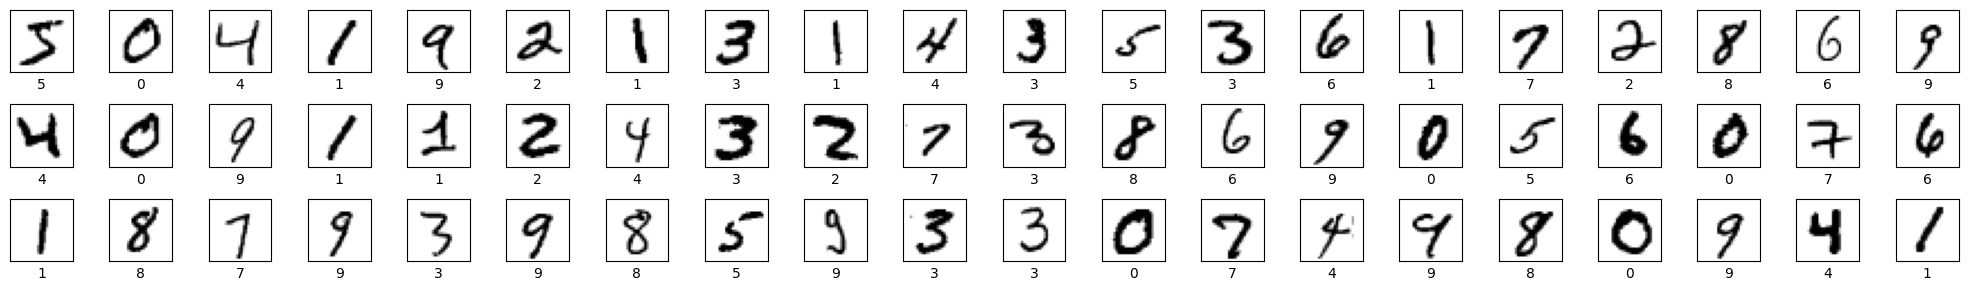

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [6]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#20): Which is digit '4'


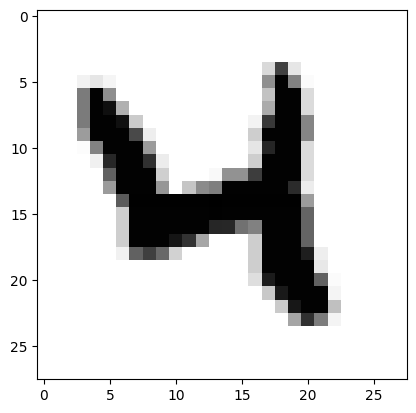

In [7]:
digit = 20 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [8]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 4s 6ms/step - loss: 0.2692 - accuracy: 0.9217 - val_loss: 0.1455 - val_accuracy: 0.9571
Epoch 2/5
657/657 [==============================] - 3s 4ms/step - loss: 0.1017 - accuracy: 0.9695 - val_loss: 0.1054 - val_accuracy: 0.9685
Epoch 3/5
657/657 [==============================] - 2s 3ms/step - loss: 0.0651 - accuracy: 0.9805 - val_loss: 0.1065 - val_accuracy: 0.9694
Epoch 4/5
657/657 [==============================] - 2s 3ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0925 - val_accuracy: 0.9736
Epoch 5/5
657/657 [==============================] - 2s 3ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.1151 - val_accuracy: 0.9688


In [11]:
k=h

In [12]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
657/657 [==============================] - 4s 5ms/step - loss: 0.0248 - accuracy: 0.9912 - val_loss: 0.1120 - val_accuracy: 0.9718
Epoch 2/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.1098 - val_accuracy: 0.9756
Epoch 3/5
657/657 [==============================] - 3s 4ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.1325 - val_accuracy: 0.9727
Epoch 4/5
657/657 [==============================] - 2s 4ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.1578 - val_accuracy: 0.9723
Epoch 5/5
657/657 [==============================] - 3s 4ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.1366 - val_accuracy: 0.9763


In [16]:
k1=h


In [17]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [18]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 4s 5ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.1585 - val_accuracy: 0.9745
Epoch 2/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.1521 - val_accuracy: 0.9767
Epoch 3/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.1591 - val_accuracy: 0.9759
Epoch 4/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.1749 - val_accuracy: 0.9752
Epoch 5/5
657/657 [==============================] - 3s 4ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.1886 - val_accuracy: 0.9756


In [19]:
k2=h

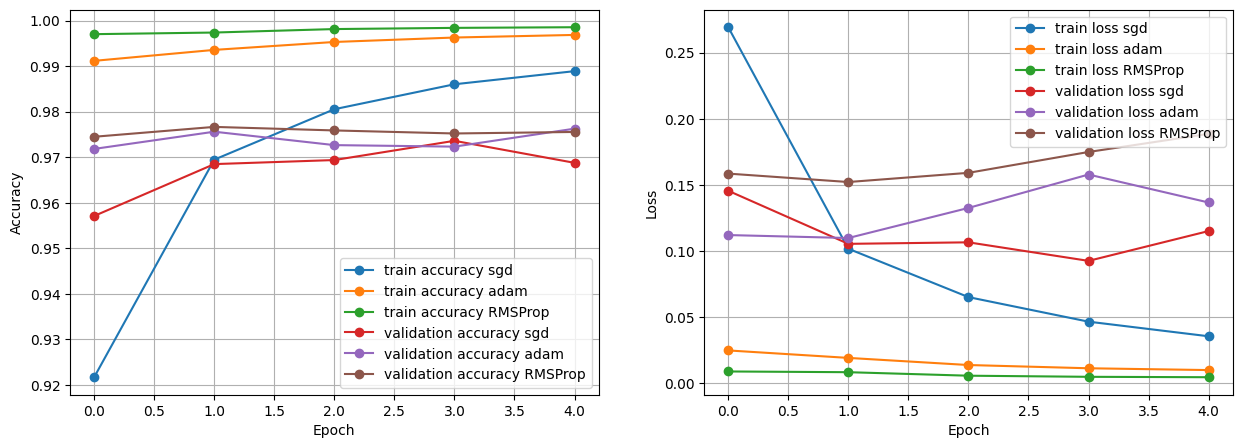

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k.history['accuracy'], 'o-', label='train accuracy sgd')
plt.plot(k1.history['accuracy'], 'o-', label='train accuracy adam')
plt.plot(k2.history['accuracy'], 'o-', label='train accuracy RMSProp')
plt.plot(k.history['val_accuracy'], 'o-', label = 'validation accuracy sgd')
plt.plot(k1.history['val_accuracy'], 'o-', label = 'validation accuracy adam')
plt.plot(k2.history['val_accuracy'], 'o-', label = 'validation accuracy RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(k.history['loss'], 'o-', label='train loss sgd')
plt.plot(k1.history['loss'], 'o-', label='train loss adam')
plt.plot(k2.history['loss'], 'o-', label='train loss RMSProp')
plt.plot(k.history['val_loss'], 'o-', label='validation loss sgd')
plt.plot(k1.history['val_loss'], 'o-', label='validation loss adam')
plt.plot(k2.history['val_loss'], 'o-', label='validation loss RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9807

Test accuracy: 0.9807000160217285


In [22]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


4/4 [==============================] - 0s 16ms/step


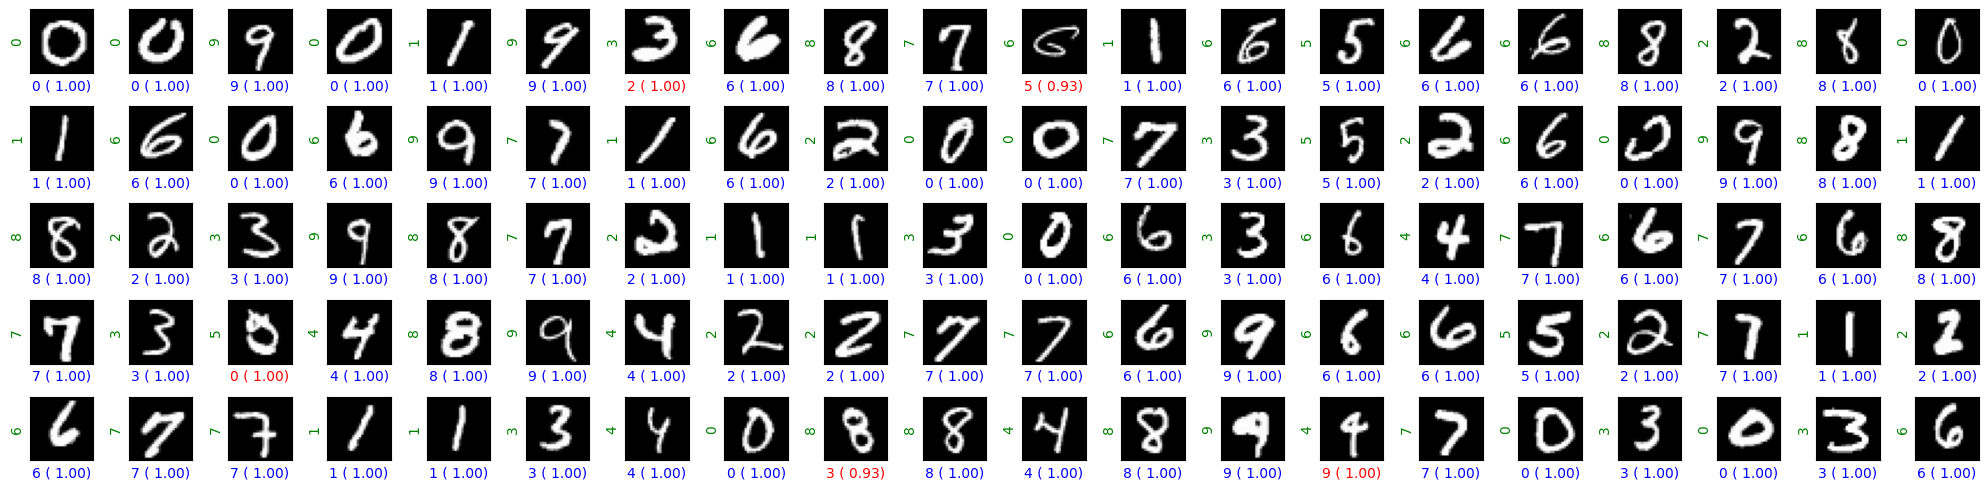

In [23]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()